# Was the rating inflation on Fandango corrected? <font style="color:rgb(0,100,200)">(Work in Progress)</font>

[Fandango](https://www.fandango.com/), an NBCUniversal subsidiary, is a popular movie rating aggregator, providing user reviews and scores for movies as well a s tickets for more than 45000 screens. At the time of writing (30 January 2020) it assignes two scores to each released movie, each of them being an integer between 0 and 100. 
The first oen is provied by the aggregator [Rotten Tomatoes](https://www.rottentomatoes.com/) and the second one is an “audience score” from Fandango.

In 2015, however, it assigned to each movie between 0 and 5 stars, with possible half stars. 
The journalist Walt Hickey, from [Five ThirtyEight](https://fivethirtyeight.com/), then found this score was, on average suspiciously large on two counts (his resuts are reported in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/)): 
* ratings from Fandango were typicaly higher than those of the aggregatorsIMDv, Metacritic, and Rotten Tomatoes, 
* the rounding of the average rating to a half-star seemed to increase the rating ost of the times.

The main aim of this project is to understand whether these effects were corrected after publication of this article. 
Obviously, the new rating system significantly reduces the impact of rounding, as a difference of one percent is much smaller than half a star in a five-star system (corresponding to 10%). 
We will thus focus on an earlier period, when the star system was still used.
The two main questions we aim at answering are: 
* Have the Fandango ratings of popular movies decreased in the year after publication of the article by Hickey? (This would be expected if, as Fandango later claimed, his findings were due to a bug to be corrected soon.)
* How did they compare to ratings by other aggregators?

Let us import the relevent packages and define a variable `path` containinf the path to the folder where the datasets are located: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '../Data/Fandango_ratings/'

## Change in the Fandango ratings after the article's publication

### Data preparation

We will use two datasets: `fandango_score_comparison.csv`, pulled on 24 AUgust 201, used by Walt Hickey in the aforementioned article, and available on [the FiveThirtyEight GitHub repository](https://github.com/fivethirtyeight/data/tree/master/fandango) and `movie_ratings_16_17`, up to date on 22 March 2017, available on [Alex Olteanu's GitHub repository](https://github.com/mircealex/Movie_ratings_2016_17), and used in [this article](https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/). 
The corresponding Pandas dataframes are called `ratings_Fandango_before` and `ratings_Fandango_after`, the suffiw before/after refering to the publication of Walt Hickey's article.

In this section, we are only interested in ratings on the Fandango wabsite, and (temporarily) discard other aggregators. 
We thus load only the relevent columns from the datasets:

In [2]:
cols_before = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'] # columns to be kept in the “before” dataframe
cols_after = ['movie', 'year', 'fandango'] # columns to be kept in the “after” dataframe

ratings_Fandango_before = pd.read_csv(path+'fandango_score_comparison.csv')[cols_before]
ratings_Fandango_after = pd.read_csv(path+'movie_ratings_16_17.csv')[cols_after]

Let us describe these columns from the documentation in the two GitHub repositories. 
In the `ratings_Fandango_before` dataset, 
* `FILM` is the title of the film, 
* 'Fandango_Stars', is number of stars the film had on its Fandango movie page,
* 'Fandango_Ratingvalue' is the Fandango ratingValue for the film as pulled from the HTML of each page, *i.e.*, the actual average over user ratins,
* 'Fandango_votes' is the number of user votes the film had on Fandango, 
* 'Fandango_Difference' is the difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue. 

In the `ratings_Fandango_after` dataset, 
* 'movie' is the title of the film, 
* 'year' is its release year, 
* 'fandango' is its Fandango rating.

Let us briefly describe thes datasets:

In [3]:
ratings_Fandango_before.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000
mean,4.089041,3.845205,3848.787671,0.243836
std,0.540386,0.502831,6357.778617,0.152665
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,222.250000,0.100000
50%,4.000000,3.900000,1446.000000,0.200000
75%,4.500000,4.200000,4439.500000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


The dataframe `ratings_Fandango_before` has 146 rows and apparently no missing values. 
We notice immediately two things, already noted in Walt Hickey's article: 
* The number of stars awarded to a movie is never smaller than the average rating.
* The difference can be large, with a maximum value of a whole half star and amean slightly above 0.25. 
(This, however, is expected if the rounding is systematically done upwards.)

In [4]:
ratings_Fandango_after.describe()

,year,fandango
count,214.000000,214.000000
mean,2016.107477,3.894860
std,0.310444,0.516781
min,2016.000000,2.500000
25%,2016.000000,3.500000
50%,2016.000000,4.000000
75%,2016.000000,4.500000
max,2017.000000,5.000000


The dataframe `ratings_Fandango_after` has 214 rows and no missing value in its numerical columns. 
The three quartiles and maximum value of the rating are the same as in the previous dataset. 
The minimum value (2.5 versus 3.0) and mean value (slightly below 3.9 versus slightly below 4.1) are smaller, with a z-score close to 3.4 for the latter (see calculation in the cell below). 
It thus seems that, *on average, the ratings on Fandango have decreased after the publication of Walt Hickey's article by a statistically significant amount*.

In [5]:
sigma_before = ratings_Fandango_before['Fandango_Stars'].std()
sigma_after = ratings_Fandango_after['fandango'].std()
n_films_before = ratings_Fandango_before.shape[0]
n_films_after = ratings_Fandango_after.shape[0]
mean_before = ratings_Fandango_before['Fandango_Stars'].mean()
mean_after = ratings_Fandango_after['fandango'].mean()

ste_diff = np.sqrt(sigma_before**2 / n_films_before + sigma_after**2 / n_films_after)
z_score = (mean_before - mean_after) / ste_diff

print('Z-score for the difference between the average numbers of stars: {:.1f}'.format(z_score))

Z-score for the difference between the average numbers of stars: 3.4


An important preliminary step before starting the analysis is to determine whether the samples provided by the datasets are representative. 
According to the `README.txt` file present in [the FiveThirtyEight GitHub repository](https://github.com/fivethirtyeight/data/tree/master/fandango), the first dataset contains all released movies which had at least 30 user reviews on Fandango as well as a Rotten Tomatoes rating, a Rotten Tomatoes User rating, a Metacritic score, a Metacritic User score, and IMDb score on 24 August 2015. 
This may exclude movies which were less popular of released too recently. 
To understand which movies were excluded and whether this affects the results, let us compare with the information in `fandango_scrape.csv`, which contains all the information Walt Hickey pulled from Fandango.

In [6]:
ratings_Fandango_before_full = pd.read_csv(path+'fandango_scrape.csv')
ratings_Fandango_before_full.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


This file has significantly more entries than `fandango_score_comparison.csv` (510 versus 146). 
The mean number of stars is also significantly lower, and the standard deviation of the numbers of stars and ratings are three times larger. 
However, directly comparing the two datasets may not be relevent as movies with less than 30 user reviews may bias the results. 
Let us thus restrict attention to films with 30 user reviews or more.

In [7]:
ratings_Fandango_before_30 = ratings_Fandango_before_full[ratings_Fandango_before_full['VOTES'] >= 30]
ratings_Fandango_before_30.describe()

,STARS,RATING,VOTES
count,212.000000,212.000000,212.000000
mean,4.188679,3.943396,2719.160377
std,0.561197,0.531031,5540.562689
min,3.000000,2.700000,30.000000
25%,4.000000,3.600000,66.000000
50%,4.500000,4.000000,466.000000
75%,4.500000,4.325000,2728.000000
max,5.000000,4.900000,34846.000000


This yields a bit more entries than in the first dataset (212 versus 146), but comparable values for the average number of stars, ratings, and their standard deviations. 
More importantly, the difference between the average number of stars and averaged rating is close to 0.25, as in the original dataset (see cell below). 

In [8]:
n_films_before_30 = ratings_Fandango_before_30.shape[0]
mean_stars_before_30 = ratings_Fandango_before_30['STARS'].mean()
std_stars_before_30 = ratings_Fandango_before_30['STARS'].std()
mean_rating_before_30 = ratings_Fandango_before_30['RATING'].mean()
std_rating_before_30 = ratings_Fandango_before_30['RATING'].std()

diff_stars_rating_before_30 = mean_stars_before_30 - mean_rating_before_30
std_diff_stars_rating_before_30 = np.sqrt(std_stars_before_30**2 / n_films_before_30 + std_rating_before_30**2 / n_films_before_30)
print('Difference between the average number of stars and rating for all movies with 30 reviews or more on Fandango: {:.2f}±{:.2f}'.format(diff_stars_rating_before_30, std_diff_stars_rating_before_30))

n_films_before = ratings_Fandango_before.shape[0]
mean_stars_before = ratings_Fandango_before['Fandango_Stars'].mean()
std_stars_before = ratings_Fandango_before['Fandango_Stars'].std()
mean_rating_before = ratings_Fandango_before['Fandango_Ratingvalue'].mean()
std_rating_before = ratings_Fandango_before['Fandango_Ratingvalue'].std()

diff_stars_rating_before = mean_stars_before - mean_rating_before
std_diff_stars_rating_before = np.sqrt(std_stars_before**2 / n_films_before + std_rating_before**2 / n_films_before)
print('Difference between the average number of stars and rating for movies in the first dataset: {:.2f}±{:.2f}'.format(diff_stars_rating_before, std_diff_stars_rating_before))

Difference between the average number of stars and rating for all movies with 30 reviews or more on Fandango: 0.25±0.05
Difference between the average number of stars and rating for movies in the first dataset: 0.24±0.06


The ReadMe file in [Alex Olteanu's GitHub repository](https://github.com/mircealex/Movie_ratings_2016_17) does not tell precisely how the movies were selected, but indicates they are a subset of the most popular ones. 
Given the size of the sample, it seems reasonable to assume that it contains most popular movies. 
The limitations of these datasets are the reasons why our analysis is restricted to popular movies and to these two periods of time (before 24 August 2015 and 2016). 
A more ambitious project, for instance extending the analysis to ratings currently provided by Fandango, would require collecting new data.

Since we are interested in the average rating in 2016, we restrict the “after” correspondingly.

In [9]:
ratings_Fandango_after = ratings_Fandango_after[ratings_Fandango_after['year'] == 2016]

### Comparing the rating distributions

Let us first show kernel density plots of the number of stars for the two stes of films, using the `fiethirtyeight` style. 
We choose a bandwith value of 0.25, half the distance between two possible scores. 
(Choosing a smaller value seems to lead to overfitting.)

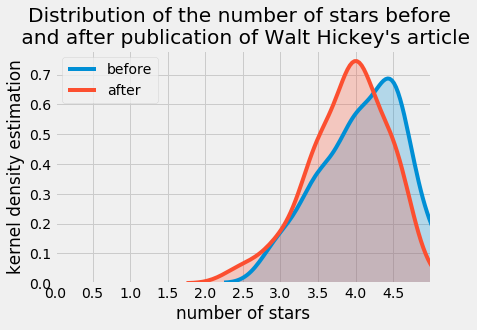

In [10]:
plt.style.use('fivethirtyeight')
sns.kdeplot(ratings_Fandango_before['Fandango_Stars'], bw=0.25, shade=True, label='before')
sns.kdeplot(ratings_Fandango_after['fandango'], bw=0.25, shade=True, label='after')
plt.xticks(np.arange(0,5,0.5))
plt.xlabel('number of stars')
plt.ylabel('kernel density estimation')
plt.xlim(0,5)
plt.title('Distribution of the number of stars before \n and after publication of Walt Hickey\'s article')
plt.legend()
plt.show()

We notice that: 
* Both distributions are left-skewed, with most values close to the high end of the range.
* The distribution of ratings for films released in 2016 is a bit less skewed than the distribution obtained before publication of the article, with a peak near 4, versus nearly 4.5 for the other distribution. 
It is also nearly symmetric between 3 and 5, while “before” distribution decreases after the peak much faster than it increases before the peak.

These plots seem to indicate that there has been a change of rating system after publication of the article, leading to slightly lower ratings.

To get a more granular view, let us plot the two frequency distributions. 
Since the datasets have different numbers of movies, we show relative distributions, expressed as percentages. 

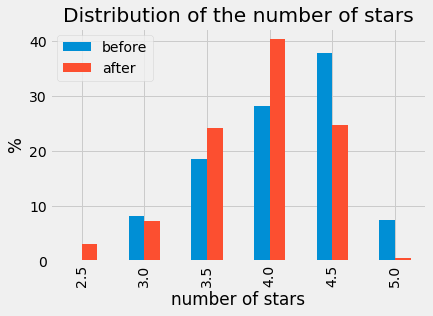

In [11]:
freqs_before = (100*ratings_Fandango_before['Fandango_Stars'].value_counts(normalize=True))
freqs_after = (100*ratings_Fandango_after['fandango'].value_counts(normalize=True))
freqs_before_and_after = pd.DataFrame([freqs_before, freqs_after]).transpose()
freqs_before_and_after.columns = ['before', 'after']
freqs_before_and_after.plot.bar()
plt.ylabel('%')
plt.xlabel('number of stars')
plt.title('Distribution of the number of stars')
plt.show()

We notice that: 
* As already noted, the “after” distribution is peaked at 4? while the “before” one is peaked at 4.5. 
* It has much less movies with 5-star ratings.
* It has a few movies rated only 2.5 stars, while the “before” destribution has no rating below 3 stars.

This again indicates generally lower ratings after publication of the article.

## Fandango vs other aggregators <font style="color:rgb(0,100,200)">(To do)</font>

## Current status <font style="color:rgb(0,100,200)">(To do)</font>